In [ ]:
import pandas as pd

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.2 MB/s eta 0:00:00


Generating Fake Data

In [2]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define constants
cities = ["Dallas", "Atlanta", "New York", "Philadelphia", "Washington", "San Francisco", "Los Angeles",
          "Seattle", "Chicago", "San Diego", "Miami", "Boston", "Detroit", "Phoenix", "Houston"]
job_titles = [
    "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry", "RegisteredNurse_Oncology",
    "RegisteredNurse_Pediatric", "PhysioTherapist", "LabTechnician", "RegisteredNurse_CriticalCare",
    "RegisteredNurse_Cardiology", "RegisteredNurse_Surgery"
]
hospital_suffixes = ["Corporate", "NonProfit", "Community", "Veterans", "Govt"]

# Define pay rate variation factors for job titles (higher for specialties)
pay_factors = {
    "RegisteredNurse_ICU": 1.2,
    "RegisteredNurse_MedSurg": 1.0,
    "RegisteredNurse_Telemetry": 1.0,
    "RegisteredNurse_Oncology": 1.5,
    "RegisteredNurse_Pediatric": 1.2,
    "PhysioTherapist": 1.1,
    "LabTechnician": 1.0,
    "RegisteredNurse_CriticalCare": 1,
    "RegisteredNurse_Cardiology": 1.4,
    "RegisteredNurse_Surgery": 1.5
}

# Define seasonal uptick periods (flu season and Christmas holidays)
flu_season_start = datetime(2023, 10, 1)
flu_season_end = datetime(2023, 12, 31)
christmas_season_start = datetime(2023, 12, 20)
christmas_season_end = datetime(2023, 12, 31)

# Helper function to generate contract start date and end date
def generate_contract_dates():
    start_date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365))
    end_date = start_date + timedelta(weeks=random.randint(1, 13))
    return start_date, end_date

# Function to calculate hourly pay rate with seasonal adjustments
def calculate_hourly_rate(job_title, contract_date):
    base_rate = random.randint(35, 75)  # Base rate between $35 and $75 per hour
    seasonal_uptick = 1.0

    # Apply seasonal uptick for flu and Christmas season
    if flu_season_start <= contract_date <= flu_season_end or christmas_season_start <= contract_date <= christmas_season_end:
        seasonal_uptick = 1.3  # 30% uptick during seasonal periods

    # Calculate the final rate
    rate = base_rate * pay_factors[job_title] * seasonal_uptick
    return round(rate, 2)

# Generate synthetic data
num_rows = 250000
data = []

for _ in range(num_rows):
    city = random.choice(cities)
    job_title = random.choice(job_titles)
    hospital_name = f"{city} {random.choice(hospital_suffixes)} Hospital"

    # Generate contract dates
    start_date, end_date = generate_contract_dates()

    # Adjust hourly pay rate based on seasonal uptick
    hourly_rate = calculate_hourly_rate(job_title, start_date)

    # Add row to data
    data.append({
        "Job Title": job_title,
        "Location": f"{city}",
        "Hospital Name": hospital_name,
        "Contract Start Date": start_date.strftime("%Y-%m-%d"),
        "Contract End Date": end_date.strftime("%Y-%m-%d"),
        "Hourly Pay Rate": hourly_rate
    })

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("nurse_pay_rates.csv", index=False)

df.head()


,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
0,RegisteredNurse_Surgery,Houston,Houston Corporate Hospital,2023-02-17,2023-03-03,58.5
1,RegisteredNurse_Cardiology,Phoenix,Phoenix Veterans Hospital,2023-06-06,2023-08-08,103.6
2,LabTechnician,Seattle,Seattle Community Hospital,2023-05-12,2023-08-11,44.0
3,RegisteredNurse_Pediatric,Atlanta,Atlanta Community Hospital,2023-06-14,2023-08-23,49.2
4,RegisteredNurse_Oncology,Phoenix,Phoenix Govt Hospital,2023-04-29,2023-05-13,84.0


In [ ]:
df.head(10)

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
0,RegisteredNurse_ICU,Miami,Miami NonProfit Hospital,2023-02-16,2023-03-09,80.4
1,RegisteredNurse_Telemetry,Philadelphia,Philadelphia Corporate Hospital,2023-09-18,2023-11-20,38.0
2,PhysioTherapist,Houston,Houston Corporate Hospital,2023-07-27,2023-10-05,50.6
3,RegisteredNurse_Telemetry,Houston,Houston Community Hospital,2023-12-31,2024-02-11,79.3
4,RegisteredNurse_MedSurg,Detroit,Detroit Govt Hospital,2023-05-29,2023-08-21,54.0
5,RegisteredNurse_Surgery,San Diego,San Diego Veterans Hospital,2023-04-24,2023-06-26,69.0
6,RegisteredNurse_ICU,Atlanta,Atlanta Govt Hospital,2023-04-03,2023-06-26,74.4
7,PhysioTherapist,Dallas,Dallas Veterans Hospital,2023-06-28,2023-09-06,79.2
8,LabTechnician,Philadelphia,Philadelphia NonProfit Hospital,2023-10-22,2023-11-12,65.0
9,PhysioTherapist,Miami,Miami Community Hospital,2023-05-24,2023-06-28,78.1


EDA on DATA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('nurse_pay_rates.csv')

# 1. Understanding the Data
print("First 5 rows of the dataset:")
print(df.head(5))



First 5 rows of the dataset:
                    Job Title Location               Hospital Name  \
0     RegisteredNurse_Surgery  Houston  Houston Corporate Hospital   
1  RegisteredNurse_Cardiology  Phoenix   Phoenix Veterans Hospital   
2               LabTechnician  Seattle  Seattle Community Hospital   
3   RegisteredNurse_Pediatric  Atlanta  Atlanta Community Hospital   
4    RegisteredNurse_Oncology  Phoenix       Phoenix Govt Hospital   

  Contract Start Date Contract End Date  Hourly Pay Rate  
0          2023-02-17        2023-03-03             58.5  
1          2023-06-06        2023-08-08            103.6  
2          2023-05-12        2023-08-11             44.0  
3          2023-06-14        2023-08-23             49.2  
4          2023-04-29        2023-05-13             84.0  


In [4]:
 #Check the basic information and data types
print("\nDataset Info:")
df.info()





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Title            250000 non-null  object 
 1   Location             250000 non-null  object 
 2   Hospital Name        250000 non-null  object 
 3   Contract Start Date  250000 non-null  object 
 4   Contract End Date    250000 non-null  object 
 5   Hourly Pay Rate      250000 non-null  float64
dtypes: float64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
df

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
0,RegisteredNurse_ICU,Miami,Miami NonProfit Hospital,2023-02-16,2023-03-09,80.4
1,RegisteredNurse_Telemetry,Philadelphia,Philadelphia Corporate Hospital,2023-09-18,2023-11-20,38.0
2,PhysioTherapist,Houston,Houston Corporate Hospital,2023-07-27,2023-10-05,50.6
3,RegisteredNurse_Telemetry,Houston,Houston Community Hospital,2023-12-31,2024-02-11,79.3
4,RegisteredNurse_MedSurg,Detroit,Detroit Govt Hospital,2023-05-29,2023-08-21,54.0
...,...,...,...,...,...,...
249995,RegisteredNurse_Pediatric,Boston,Boston Corporate Hospital,2023-08-26,2023-10-07,79.2
249996,RegisteredNurse_Telemetry,San Francisco,San Francisco Govt Hospital,2023-01-15,2023-04-16,37.0
249997,RegisteredNurse_Cardiology,Dallas,Dallas NonProfit Hospital,2023-07-25,2023-10-10,51.8
249998,LabTechnician,Los Angeles,Los Angeles Corporate Hospital,2023-10-29,2023-11-12,46.8


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
Job Title              0
Location               0
Hospital Name          0
Contract Start Date    0
Contract End Date      0
Hourly Pay Rate        0
dtype: int64


In [6]:
# 2. Statistical Summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       Hourly Pay Rate
count    250000.000000
mean         70.400979
std          21.214178
min          35.000000
25%          54.600000
50%          67.600000
75%          83.200000
max         146.250000


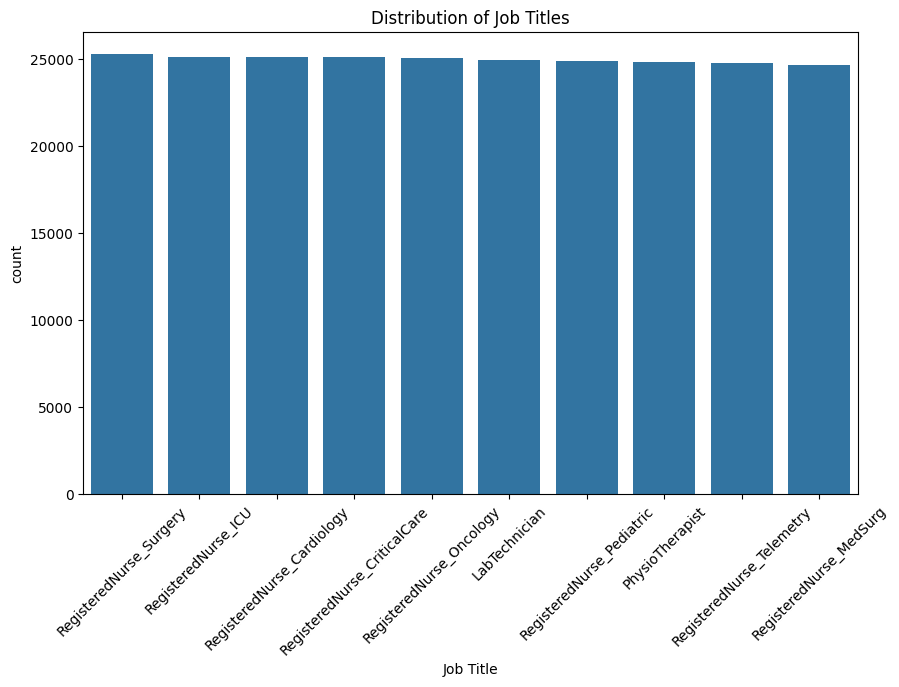

In [7]:
# 3. Categorical Data Analysis
#Representation of  Distribution of Job Titles using Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job Title', order=df['Job Title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xticks(rotation=45)
plt.show()


a. variations of the hourly pay rates across the
major metros



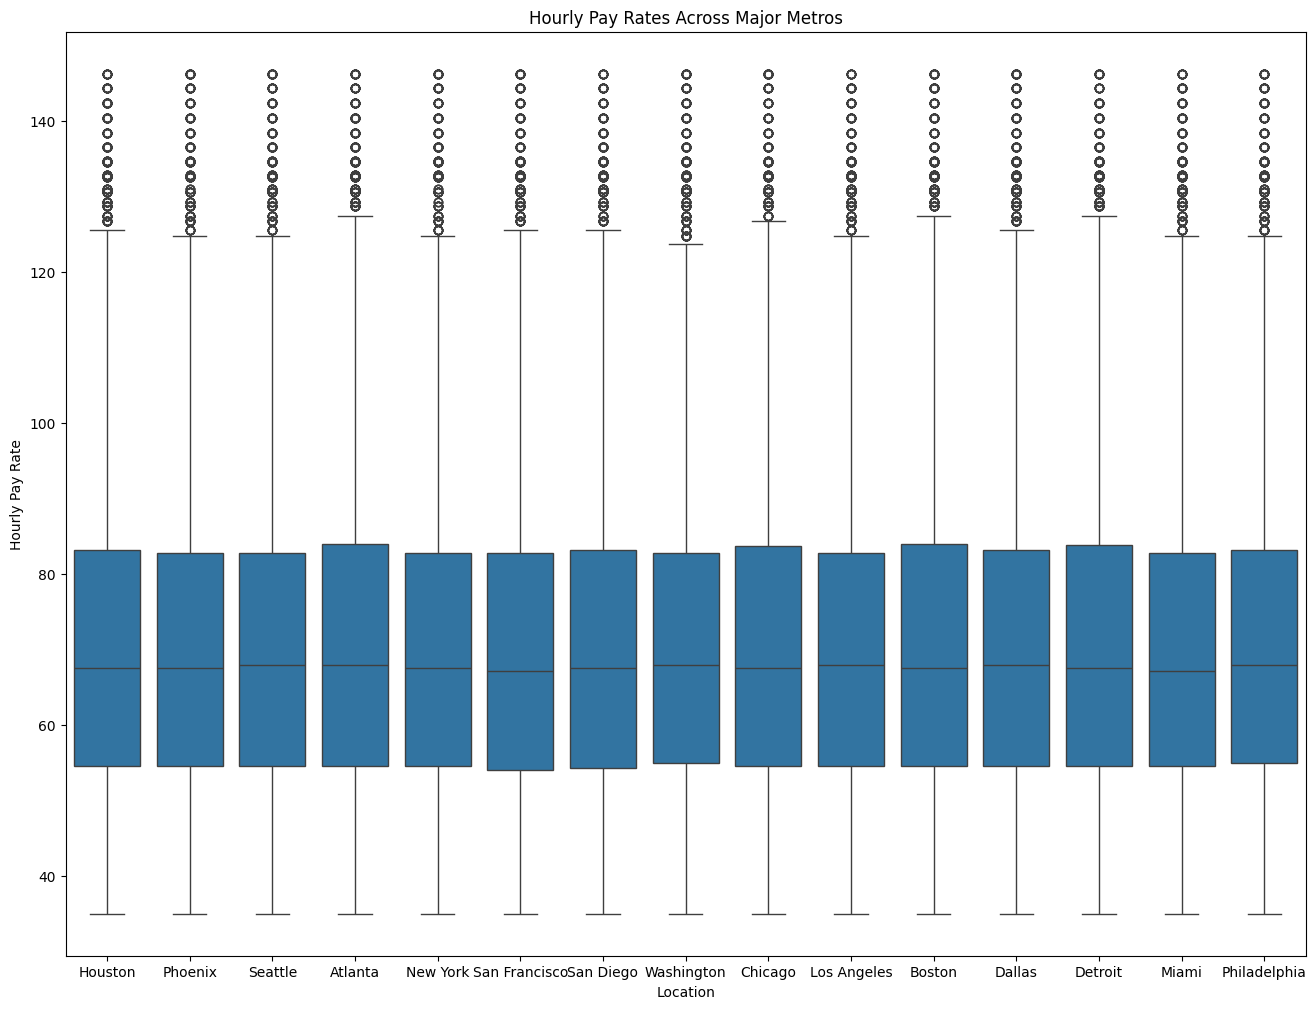

In [8]:

# Plot hourly pay rates across metros
plt.figure(figsize=(16, 12))
sns.boxplot(x='Location', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rates Across Major Metros')
plt.show()

 **show the uptick in pay rates during flu &
holiday**

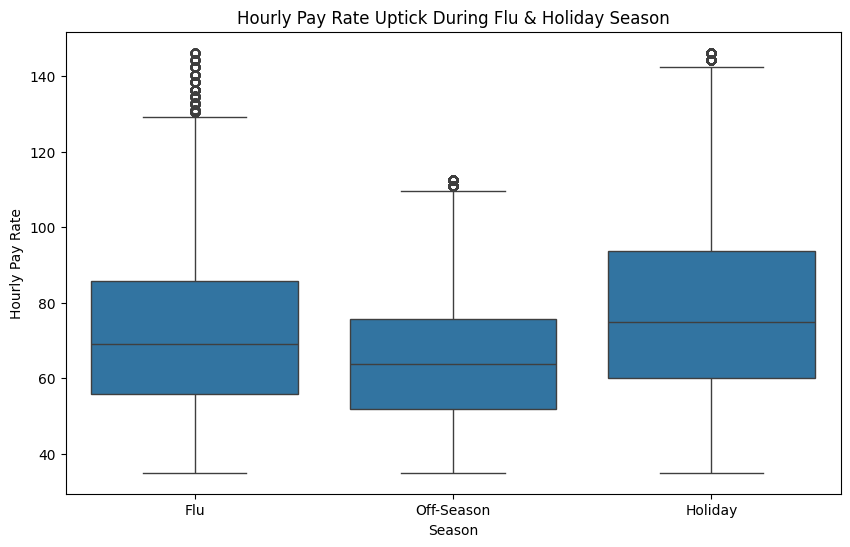

In [9]:
# Convert Contract Start Date to datetime
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])

# Define a function to classify the season
def classify_season(date):
    if (date.month in [11, 12, 1]):  # Holiday season (November, December, January)
        return 'Holiday'
    elif (date.month in [10, 2, 3]):  # Flu season (October to March)
        return 'Flu'
    else:
        return 'Off-Season'

# Apply the season classification
df['Season'] = df['Contract Start Date'].apply(classify_season)

# Visualize the uptick in pay rates during flu & holiday season
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rate Uptick During Flu & Holiday Season')
plt.show()

**From the above Boxplot , it can be seen the high hourly payrates during Holiday and Flu season as compared to OFF Season**



In [ ]:
df.head(10)

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate,Season
0,RegisteredNurse_MedSurg,Atlanta,Atlanta NonProfit Hospital,2023-12-02,2024-01-20,68.90,Holiday
1,RegisteredNurse_Cardiology,Atlanta,Atlanta Community Hospital,2023-05-11,2023-06-29,68.60,Off-Season
2,RegisteredNurse_Pediatric,Philadelphia,Philadelphia Community Hospital,2023-11-20,2024-01-08,99.84,Holiday
3,RegisteredNurse_MedSurg,San Francisco,San Francisco Corporate Hospital,2023-11-19,2024-01-21,58.50,Holiday
4,RegisteredNurse_CriticalCare,Chicago,Chicago Community Hospital,2023-02-12,2023-03-19,44.00,Flu
5,RegisteredNurse_Pediatric,Houston,Houston NonProfit Hospital,2023-06-04,2023-07-02,73.20,Off-Season
6,RegisteredNurse_CriticalCare,Seattle,Seattle Veterans Hospital,2023-02-04,2023-04-08,40.00,Flu
7,RegisteredNurse_MedSurg,Boston,Boston Community Hospital,2023-01-23,2023-03-20,46.00,Holiday
8,RegisteredNurse_MedSurg,Boston,Boston Govt Hospital,2023-12-04,2024-02-26,58.50,Holiday
9,LabTechnician,Detroit,Detroit Veterans Hospital,2023-10-30,2023-11-20,79.30,Flu


In [10]:
df['Location'].value_counts()

,count
Location,
Atlanta,16862
Houston,16800
San Francisco,16783
Dallas,16759
Washington,16716
Boston,16692
Los Angeles,16671
Detroit,16669
Phoenix,16644


**Random Values for the City Desirability attributes as No Info is been given**

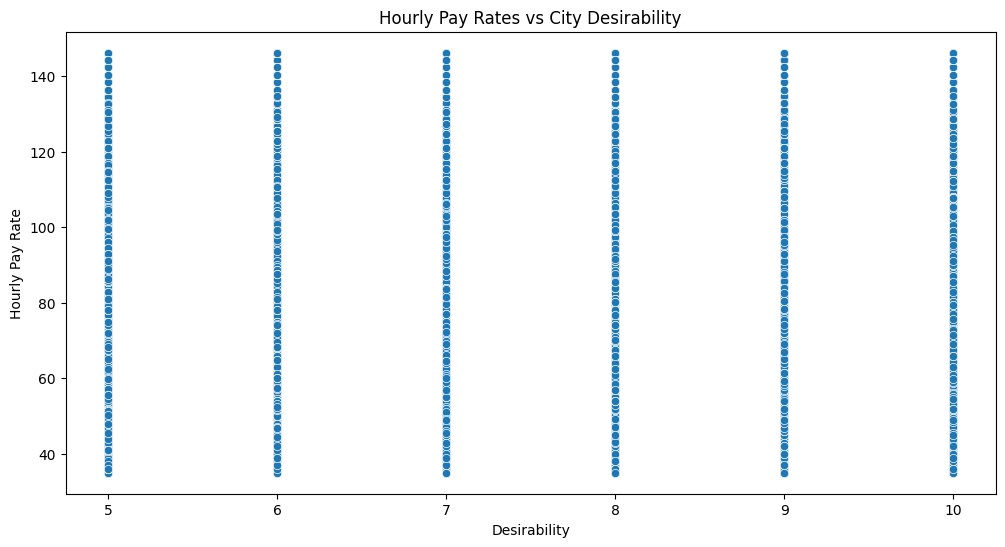

In [11]:
 # This should be replaced with real desirability data
city_desirability = {
    "Dallas": 8, "Atlanta": 7, "New York": 10, "Philadelphia": 6, "Washington": 9,
    "San Francisco": 10, "Los Angeles": 9, "Seattle": 8, "Chicago": 7, "San Diego": 8,
    "Miami": 6, "Boston": 9, "Detroit": 5, "Phoenix": 6, "Houston": 7
}

df['Desirability'] = df['Location'].map(city_desirability)
# Scatterplot for hourly pay rates vs. desirability
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Desirability', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rates vs City Desirability')
plt.show()








### as value of City Desirability lie between 5 to 10

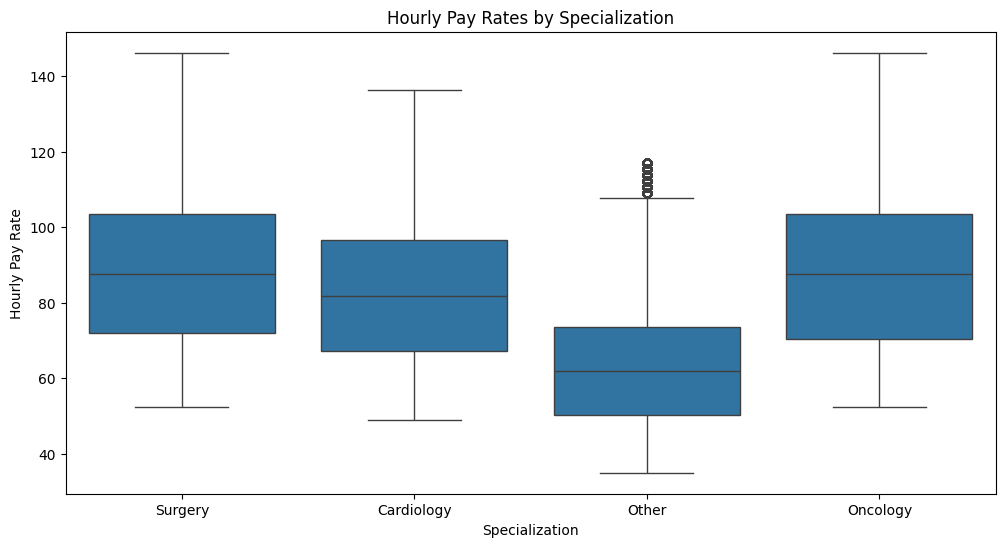

In [12]:
# 4. **Pay Rates by Specialization (Oncology, Cardiology, Surgery)**
# Assuming job titles follow a pattern such as 'RegisteredNurse_Oncology'
def extract_specialization(job_title):
    if 'Oncology' in job_title:
        return 'Oncology'
    elif 'Cardiology' in job_title:
        return 'Cardiology'
    elif 'Surgery' in job_title:
        return 'Surgery'
    else:
        return 'Other'

df['Specialization'] = df['Job Title'].apply(extract_specialization)

# Boxplot for hourly pay rates by specialization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rates by Specialization')
plt.show()

It is Clearly Visible Job in Surgery,cardiology,Oncology have higher hourly payrates as compared to other Jobs
Also There are outlier which have higher payrate in Other deptt

In [13]:
!pip install scikit-learn
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00


In [14]:
# Convert Contract Start and End Date to datetime
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])
df['Contract End Date'] = pd.to_datetime(df['Contract End Date'])

# Finding the month of contract start date and contract end date
df['Contract Start Month'] = df['Contract Start Date'].dt.month

df['Contract End Month'] = df['Contract End Date'].dt.month



###I have used Binary Encoding for JOB TITLE, Hospital name as it is nominal data and vast data to handle this case

encoder = ce.BinaryEncoder(cols=["Job Title", "Location", "Hospital Name"])
df_encode = encoder.fit_transform(df)


###label Encoding for ordinal data
encoded_df = pd.get_dummies(df_encode, columns=["Specialization","Season","Desirability"], drop_first=True)



# Display the prepared data
print(df.head())
# df.drop(columns=['Job Title','Location','Hospital Name','Contract Start Date','Contract End Date','Desirability','Season'],inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


                    Job Title Location               Hospital Name  \
0     RegisteredNurse_Surgery  Houston  Houston Corporate Hospital   
1  RegisteredNurse_Cardiology  Phoenix   Phoenix Veterans Hospital   
2               LabTechnician  Seattle  Seattle Community Hospital   
3   RegisteredNurse_Pediatric  Atlanta  Atlanta Community Hospital   
4    RegisteredNurse_Oncology  Phoenix       Phoenix Govt Hospital   

  Contract Start Date Contract End Date  Hourly Pay Rate      Season  \
0          2023-02-17        2023-03-03             58.5         Flu   
1          2023-06-06        2023-08-08            103.6  Off-Season   
2          2023-05-12        2023-08-11             44.0  Off-Season   
3          2023-06-14        2023-08-23             49.2  Off-Season   
4          2023-04-29        2023-05-13             84.0  Off-Season   

   Desirability Specialization  Contract Start Month  Contract End Month  
0             7        Surgery                     2                   

In [15]:
encoded_df.drop(columns=['Contract Start Date','Contract End Date'],inplace=True)

In [16]:
encoded_df.columns

Index(['Job Title_0', 'Job Title_1', 'Job Title_2', 'Job Title_3',
       'Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Hospital Name_0', 'Hospital Name_1', 'Hospital Name_2',
       'Hospital Name_3', 'Hospital Name_4', 'Hospital Name_5',
       'Hospital Name_6', 'Hourly Pay Rate', 'Contract Start Month',
       'Contract End Month', 'Specialization_Oncology', 'Specialization_Other',
       'Specialization_Surgery', 'Season_Holiday', 'Season_Off-Season',
       'Desirability_6', 'Desirability_7', 'Desirability_8', 'Desirability_9',
       'Desirability_10'],
      dtype='object')

In [17]:
for col in encoded_df.select_dtypes(include=["object"]):
    print(f"Unique values in {col}:")
    print(encoded_df[col].unique())

In [18]:
correlation_matrix_pearman = encoded_df.corr(method='pearson')


In [19]:
correlation_matrix_pearman

,Job Title_0,Job Title_1,Job Title_2,Job Title_3,Location_0,Location_1,Location_2,Location_3,Hospital Name_0,Hospital Name_1,...,Specialization_Oncology,Specialization_Other,Specialization_Surgery,Season_Holiday,Season_Off-Season,Desirability_6,Desirability_7,Desirability_8,Desirability_9,Desirability_10
Job Title_0,1.000000,-0.532649,-0.219375,-0.218386,-0.000567,0.001831,0.000433,0.000323,0.002464,-0.001828,...,-0.218616,0.430868,-0.219777,0.000531,-0.002820,-0.003286,0.001084,0.003250,-0.001533,0.001493
Job Title_1,-0.532649,1.000000,-0.000245,0.000606,0.000581,-0.001369,-0.001002,0.000085,-0.000852,0.001126,...,0.410431,0.088917,-0.272822,-0.001194,0.003934,0.000167,-0.000873,-0.002300,0.001494,0.001216
Job Title_2,-0.219375,-0.000245,1.000000,-0.200584,0.000370,0.001022,0.001540,-0.001614,-0.003323,0.001085,...,-0.332291,0.216697,-0.334057,-0.000278,0.002120,0.003004,-0.001133,0.000738,-0.000550,-0.001773
Job Title_3,-0.218386,0.000606,-0.200584,1.000000,0.002326,-0.000955,0.000254,-0.000025,-0.002258,0.001217,...,0.332941,-0.217979,0.334710,-0.001080,0.002200,0.000914,-0.000584,-0.002829,0.001487,0.002328
Location_0,-0.000567,0.000581,0.000370,0.002326,1.000000,-0.071409,-0.069786,-0.069924,0.114319,-0.002342,...,0.004167,-0.001923,-0.000768,0.001077,0.000619,0.133254,-0.204572,-0.196498,0.468309,-0.419440
Location_1,0.001831,-0.001369,0.001022,-0.000955,-0.071409,1.000000,-0.072148,-0.073524,0.043464,0.049825,...,-0.001528,0.000924,-0.000699,-0.000959,0.000643,0.132967,-0.198629,0.133908,-0.535204,0.367015
Location_2,0.000433,-0.001002,0.001540,0.000254,-0.069786,-0.072148,1.000000,-0.070927,0.115175,0.105682,...,0.001464,-0.001095,-0.000476,-0.001458,-0.001217,0.468054,-0.534759,0.131090,0.134383,-0.023022
Location_3,0.000323,0.000085,-0.001614,-0.000025,-0.069924,-0.073524,-0.070927,1.000000,-0.028851,0.213115,...,-0.001208,-0.000046,0.001226,0.001242,-0.001145,-0.198652,0.133004,0.131519,-0.199086,-0.027345
Hospital Name_0,0.002464,-0.000852,-0.003323,-0.002258,0.114319,0.043464,0.115175,-0.028851,1.000000,-0.375940,...,-0.003228,0.003813,-0.000466,0.001798,-0.001794,0.144086,-0.032878,-0.037054,0.053815,-0.170723
Hospital Name_1,-0.001828,0.001126,0.001085,0.001217,-0.002342,0.049825,0.105682,0.213115,-0.375940,1.000000,...,0.002197,-0.002940,-0.000108,-0.000356,0.000676,0.040993,-0.095991,-0.029084,-0.024657,0.060109


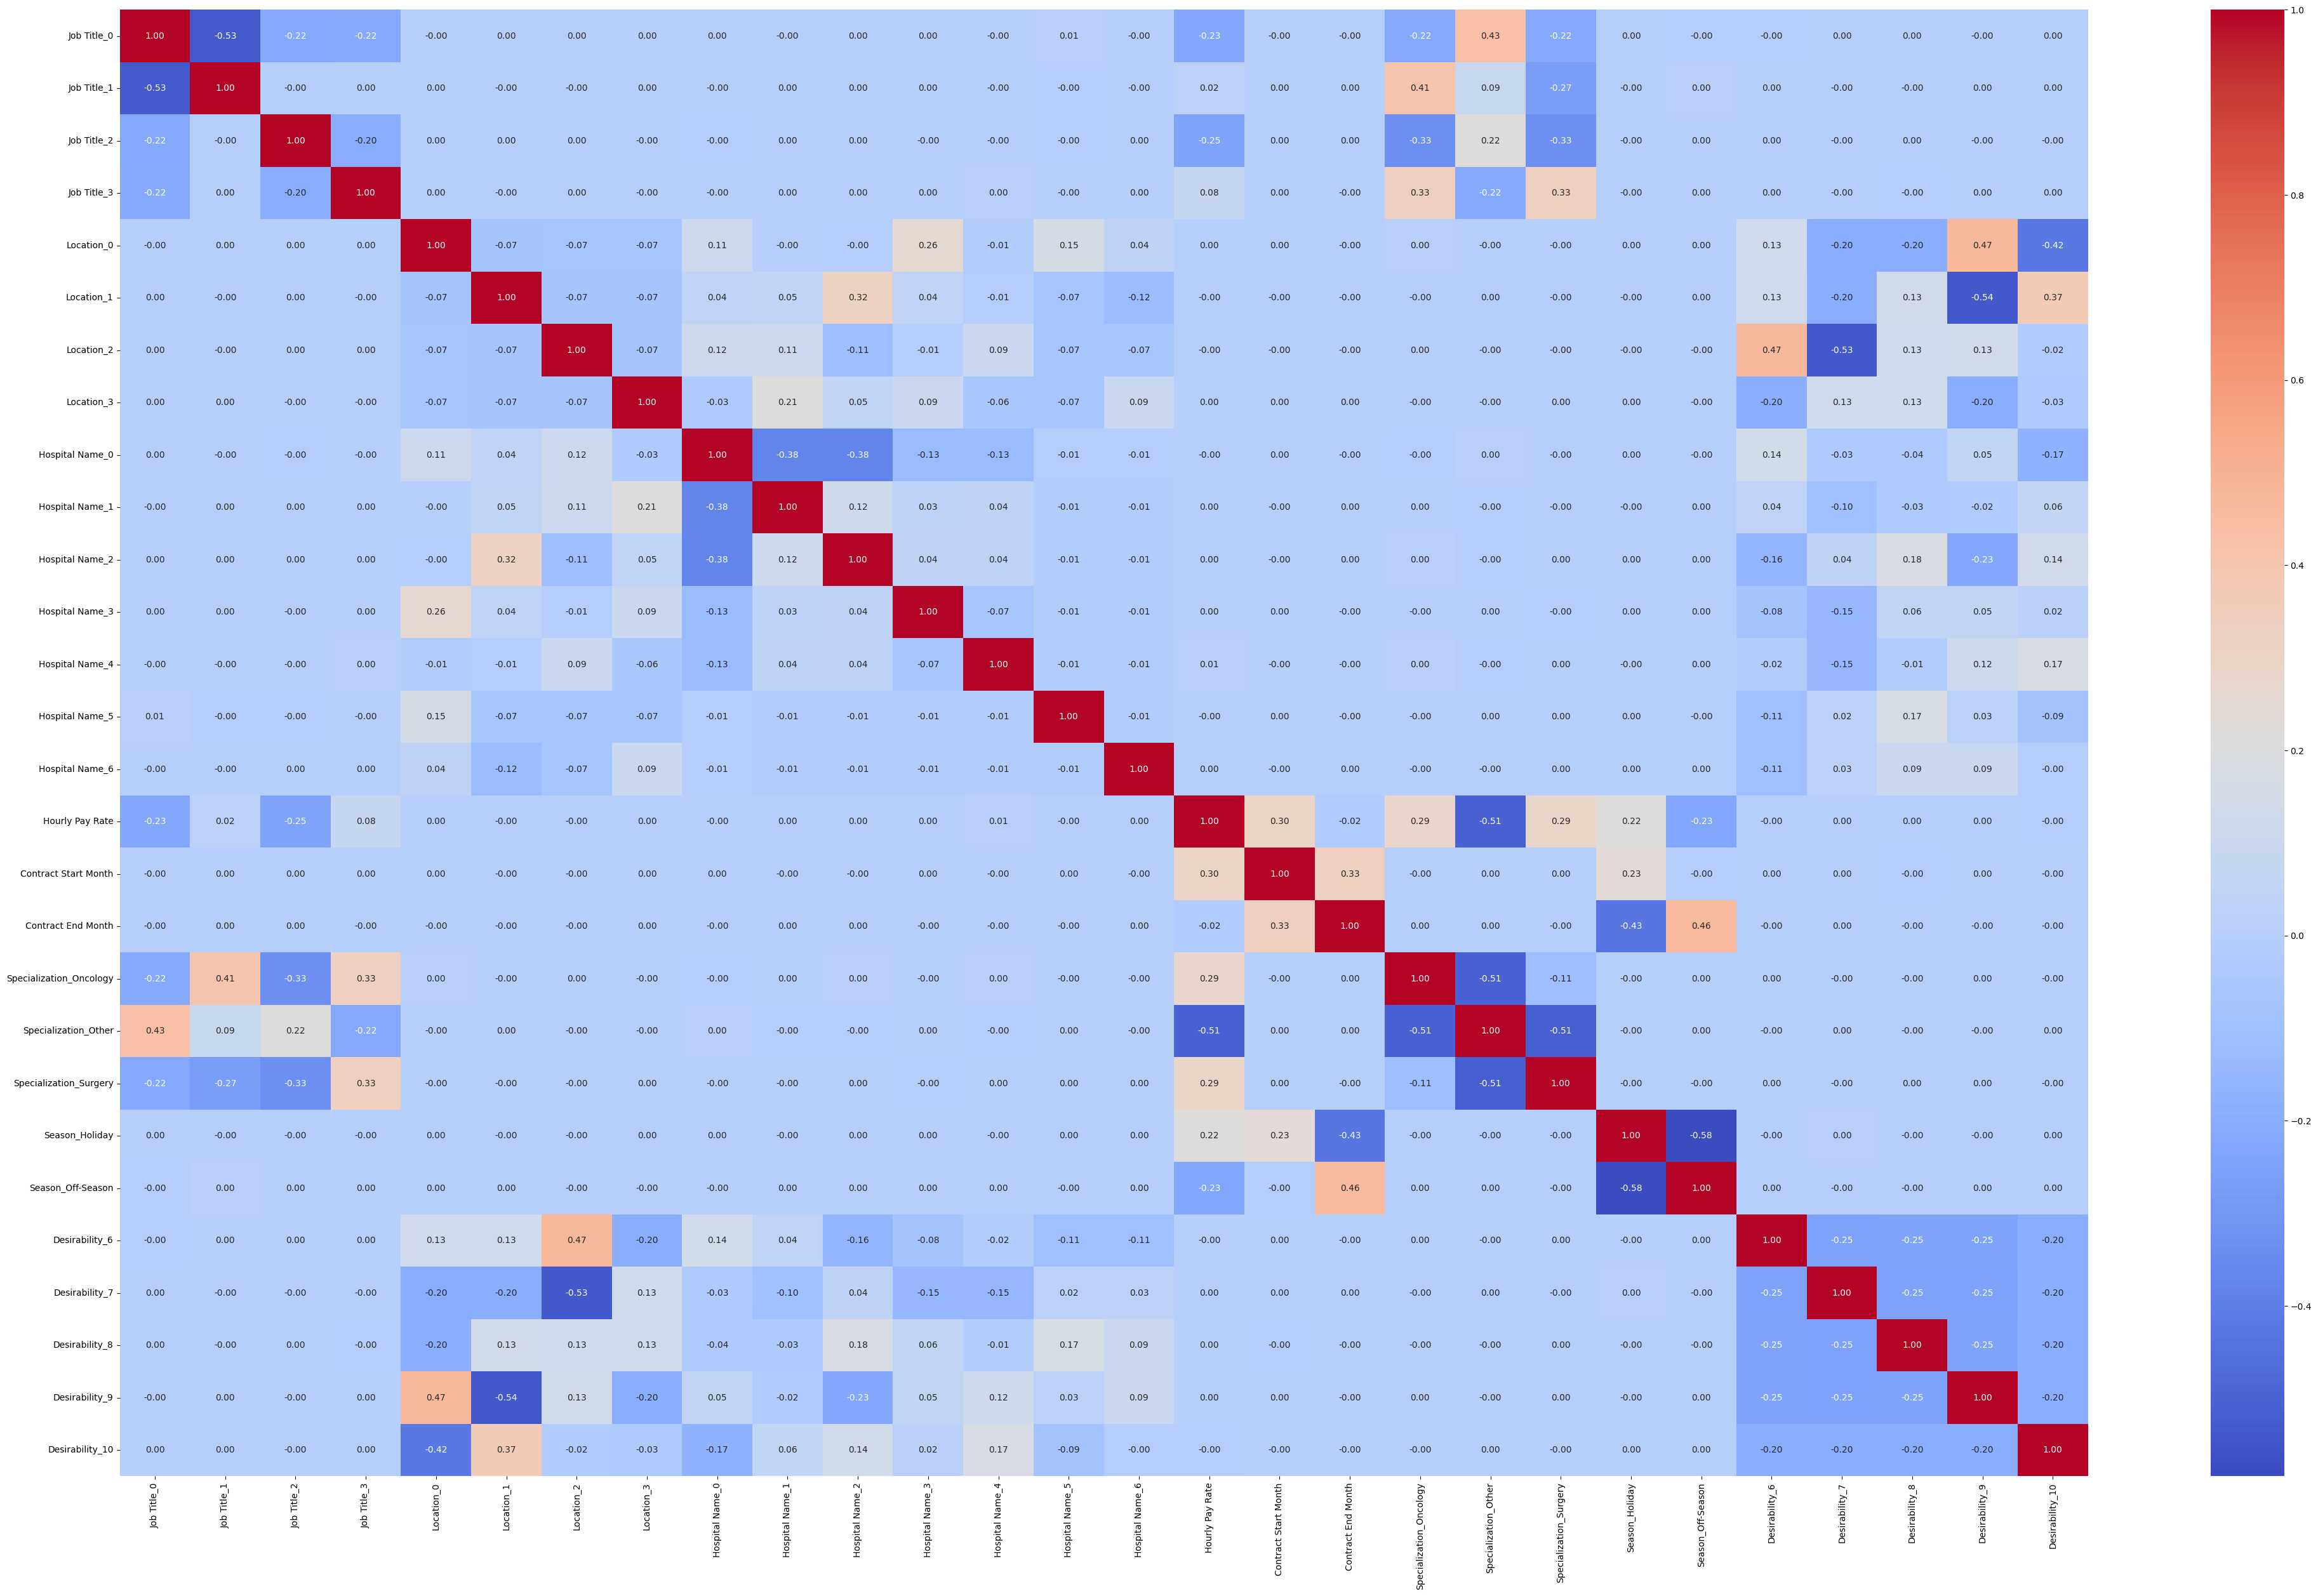

In [20]:
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix_pearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [21]:
kendall_df=encoded_df.corr(method='kendall')

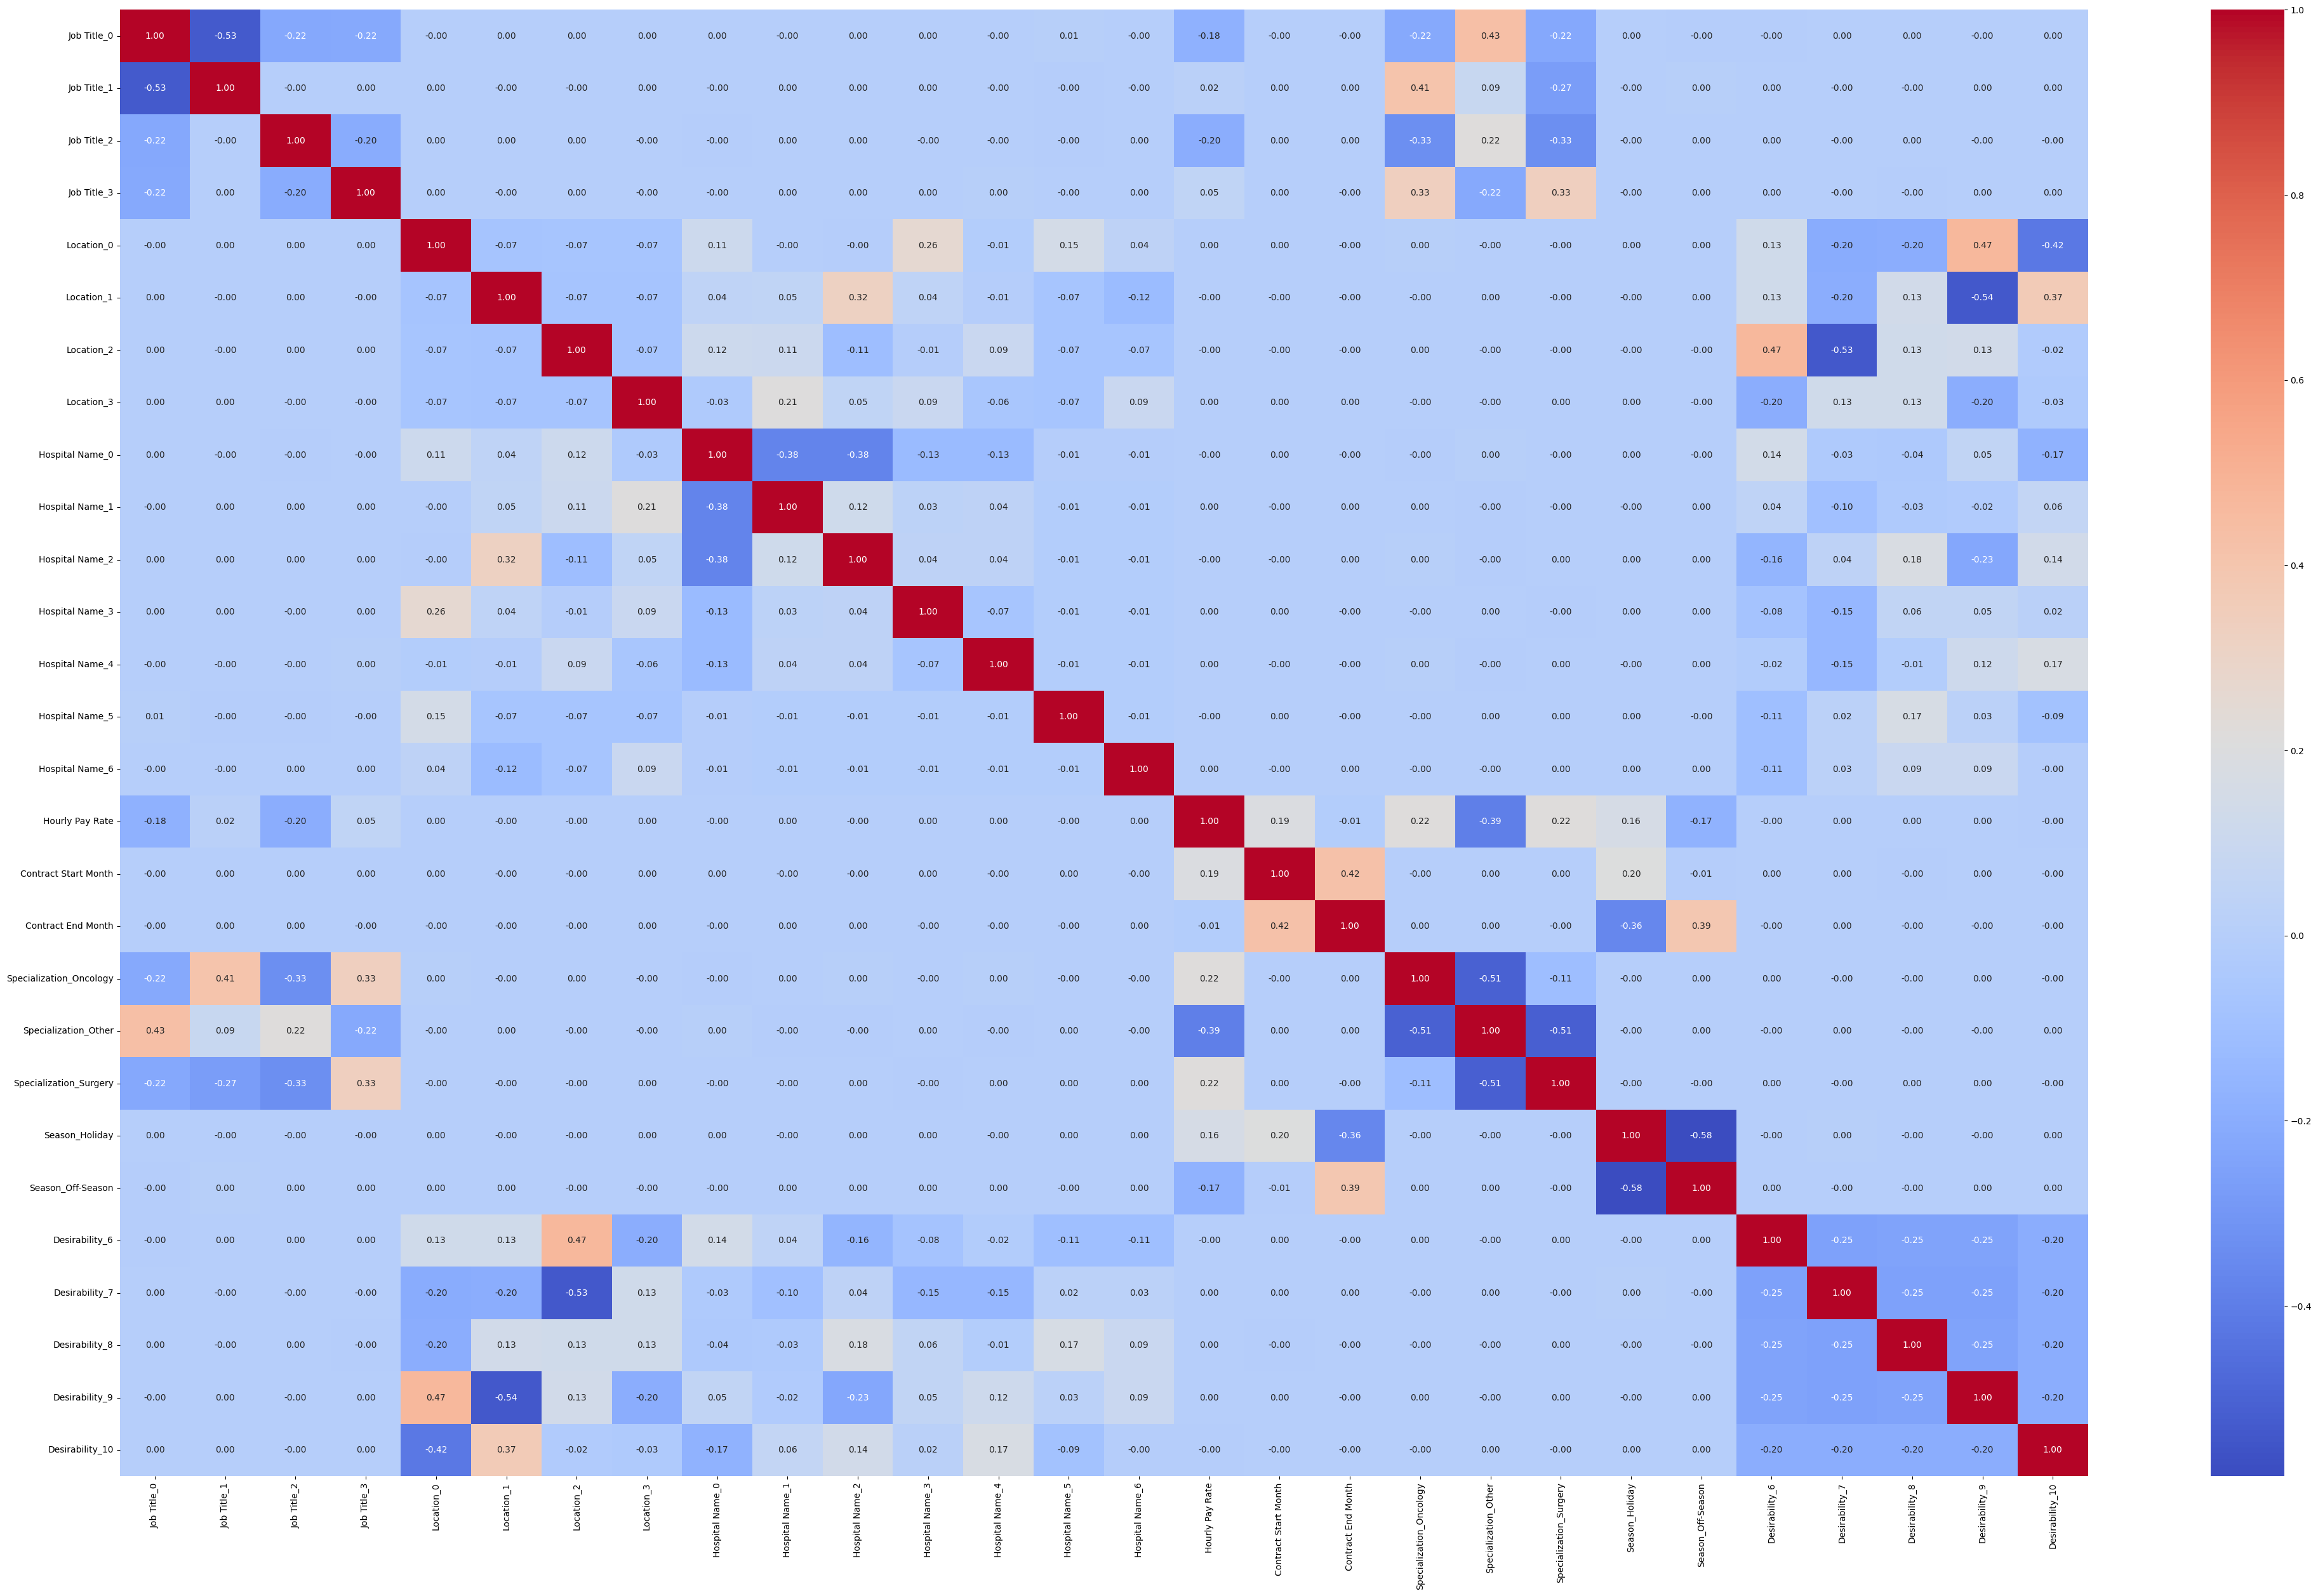

In [22]:
plt.figure(figsize=(50, 30))
sns.heatmap(kendall_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
####From Correlation matrix , location , hospital and desirability are highly correlated

In [42]:
df

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate,Season,Desirability,Specialization,Contract Start Month,Contract End Month
0,RegisteredNurse_Surgery,Houston,Houston Corporate Hospital,2023-02-17,2023-03-03,58.5,Flu,7,Surgery,2,3
1,RegisteredNurse_Cardiology,Phoenix,Phoenix Veterans Hospital,2023-06-06,2023-08-08,103.6,Off-Season,6,Cardiology,6,8
2,LabTechnician,Seattle,Seattle Community Hospital,2023-05-12,2023-08-11,44.0,Off-Season,8,Other,5,8
3,RegisteredNurse_Pediatric,Atlanta,Atlanta Community Hospital,2023-06-14,2023-08-23,49.2,Off-Season,7,Other,6,8
4,RegisteredNurse_Oncology,Phoenix,Phoenix Govt Hospital,2023-04-29,2023-05-13,84.0,Off-Season,6,Oncology,4,5
...,...,...,...,...,...,...,...,...,...,...,...
249995,RegisteredNurse_MedSurg,Los Angeles,Los Angeles Community Hospital,2023-07-01,2023-09-09,52.0,Off-Season,9,Other,7,9
249996,RegisteredNurse_Cardiology,Phoenix,Phoenix Veterans Hospital,2023-07-25,2023-08-22,57.4,Off-Season,6,Cardiology,7,8
249997,LabTechnician,Philadelphia,Philadelphia Corporate Hospital,2023-10-17,2024-01-09,46.8,Flu,6,Other,10,1
249998,PhysioTherapist,San Diego,San Diego NonProfit Hospital,2023-03-24,2023-04-21,45.1,Flu,8,Other,3,4


In [24]:
encoded_df

,Job Title_0,Job Title_1,Job Title_2,Job Title_3,Location_0,Location_1,Location_2,Location_3,Hospital Name_0,Hospital Name_1,...,Specialization_Oncology,Specialization_Other,Specialization_Surgery,Season_Holiday,Season_Off-Season,Desirability_6,Desirability_7,Desirability_8,Desirability_9,Desirability_10
0,0,0,0,1,0,0,0,1,0,0,...,False,False,True,False,False,False,True,False,False,False
1,0,0,1,0,0,0,1,0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,0,0,1,1,0,0,1,1,0,0,...,False,True,False,False,True,False,False,True,False,False
3,0,1,0,0,0,1,0,0,0,0,...,False,True,False,False,True,False,True,False,False,False
4,0,1,0,1,0,0,1,0,0,0,...,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,1,1,0,1,0,1,0,1,0,...,False,True,False,False,True,False,False,False,True,False
249996,0,0,1,0,0,0,1,0,0,0,...,False,False,False,False,True,True,False,False,False,False
249997,0,0,1,1,1,1,1,1,0,1,...,False,True,False,False,False,True,False,False,False,False
249998,0,1,1,1,0,1,1,1,0,1,...,False,True,False,False,False,False,False,True,False,False


In [25]:
df

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate,Season,Desirability,Specialization,Contract Start Month,Contract End Month
0,RegisteredNurse_Surgery,Houston,Houston Corporate Hospital,2023-02-17,2023-03-03,58.5,Flu,7,Surgery,2,3
1,RegisteredNurse_Cardiology,Phoenix,Phoenix Veterans Hospital,2023-06-06,2023-08-08,103.6,Off-Season,6,Cardiology,6,8
2,LabTechnician,Seattle,Seattle Community Hospital,2023-05-12,2023-08-11,44.0,Off-Season,8,Other,5,8
3,RegisteredNurse_Pediatric,Atlanta,Atlanta Community Hospital,2023-06-14,2023-08-23,49.2,Off-Season,7,Other,6,8
4,RegisteredNurse_Oncology,Phoenix,Phoenix Govt Hospital,2023-04-29,2023-05-13,84.0,Off-Season,6,Oncology,4,5
...,...,...,...,...,...,...,...,...,...,...,...
249995,RegisteredNurse_MedSurg,Los Angeles,Los Angeles Community Hospital,2023-07-01,2023-09-09,52.0,Off-Season,9,Other,7,9
249996,RegisteredNurse_Cardiology,Phoenix,Phoenix Veterans Hospital,2023-07-25,2023-08-22,57.4,Off-Season,6,Cardiology,7,8
249997,LabTechnician,Philadelphia,Philadelphia Corporate Hospital,2023-10-17,2024-01-09,46.8,Flu,6,Other,10,1
249998,PhysioTherapist,San Diego,San Diego NonProfit Hospital,2023-03-24,2023-04-21,45.1,Flu,8,Other,3,4


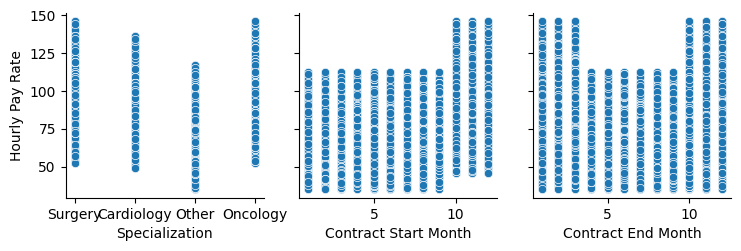

In [43]:
sns.pairplot(df, y_vars=['Hourly Pay Rate'], x_vars=['Specialization', 'Contract Start Month', 'Contract End Month'])
plt.show()

In [45]:
###target variable(Hourly pay rate) is continuous and numeric and features(contract start month) mostly show linear relationships with target variable
## Number of Attributes are large hence applying Dimension reduction to reduce the dimension of data by taking the most relevant attributes
#Hence Applying Linear Regression


In [46]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Split into features (X) and target (y)
X = encoded_df.drop(columns=['Hourly Pay Rate'])
y = encoded_df['Hourly Pay Rate']

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Set threshold for explained variance (e.g., 95%)
threshold = 0.90

# Find the number of components needed to meet the threshold
no_components = np.argmax(cumulative_variance >= threshold) + 1

print(no_components)


columns=X.columns
print(columns)

# Step 2: Apply PCA (reduce dimensions to 2 for simplicity, adjust n_components as needed)
pca = PCA(n_components=no_components)
X_pca = pca.fit_transform(X_scaled)


18
Index(['Job Title_0', 'Job Title_1', 'Job Title_2', 'Job Title_3',
       'Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Hospital Name_0', 'Hospital Name_1', 'Hospital Name_2',
       'Hospital Name_3', 'Hospital Name_4', 'Hospital Name_5',
       'Hospital Name_6', 'Contract Start Month', 'Contract End Month',
       'Specialization_Oncology', 'Specialization_Other',
       'Specialization_Surgery', 'Season_Holiday', 'Season_Off-Season',
       'Desirability_6', 'Desirability_7', 'Desirability_8', 'Desirability_9',
       'Desirability_10'],
      dtype='object')


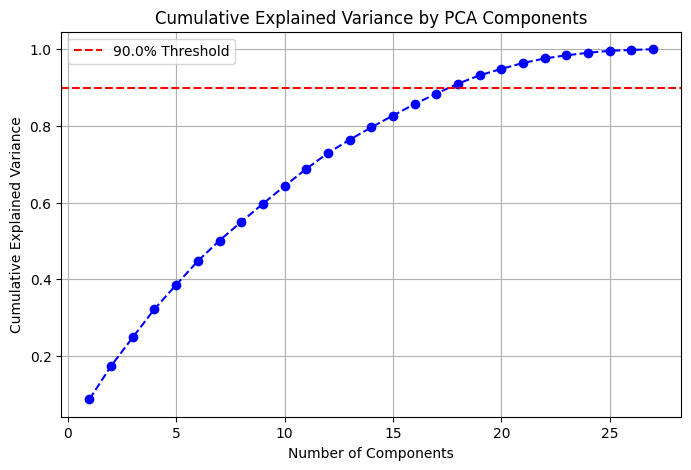

In [47]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.legend()
plt.grid()
plt.show()

In [50]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)


with open('linear.pkl', 'wb') as f:
    pickle.dump({'columns':columns,'scaler': scaler, 'pca': pca, 'model': lr_model}, f)
# Evaluate the model
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Print results
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {rmse}")



MAE: 13.567188821688932
RMSE: 16.26785518329066


**TO STUDY AND INCLUDE THE COMPLEX RELATIONSHIP BETWEEN THE TARGET VARIABLES AND FEATURES , APPLYING RANDOM FOREST**

**Applying Random Forest Regressor**

In [51]:
####Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor





# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)



# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
with open('random.pkl', 'wb') as f:
    pickle.dump({'columns':columns,'scaler': scaler, 'pca': pca, 'model': rf_model}, f)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))


# Print results
print(f"RMSE: {rmse}")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions)}")




RMSE: 15.602560730931296
MAE: 13.17537201934957


In [ ]:
##Linear Regression and Random Forest both are giving the same results as the data does not include Strong non linear and complex relationship
# RMSE: 16.298425613826122
# MAE: 13.742807430121996

# Hourly pay range from, 35 to 146 , both RMSE and MAE can be considered. For instance:
# A small RMSE or MAE in relation to the payrate range would indicate that the model's predictions are relatively accurate.

#RMSE (Root Mean Squared Error): RMSE gives more weight to large errors because it squares the residuals before averaging them. It is sensitive to outliers, so if your payrate data has large deviations, RMSE can inflate its value.
#MAE (Mean Absolute Error): MAE is the average of the absolute errors. It treats all errors equally, without putting more weight on large errors. It is less sensitive to outliers compared to RMSE.



**Storing Model in .pkl files**

In [35]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [40]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import joblib
import pickle
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Title and description
st.title('Nurse Hourly Rate Prediction')
st.write('Input the job requirements to predict the hourly rate.')

# Input fields
job_title = st.selectbox('Job Title', [
    "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
    "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
    "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
    "RegisteredNurse_Surgery"
])
location = st.selectbox('Location', [
    "Dallas", "Atlanta", "New York", "Philadelphia", "Washington",
    "San Francisco, CA", "Los Angeles, CA", "Seattle, WA", "Chicago", "San Diego",
    "Miami", "Boston", "Detroit", "Phoenix", "Houston"
])
hospital_name = st.text_input('Hospital Name')
contract_start_date = st.date_input('Contract Start Date', value=datetime(2024, 1, 1))
contract_end_date = st.date_input('Contract End Date', value=datetime(2024, 1, 15))

# Prepare input data
def preprocess_input(job_title, location, hospital_name, contract_start_date, contract_end_date):
    input_data = pd.DataFrame({
        'Job Title': [job_title],
        'Location': [location],
        'Hospital Name': [hospital_name],
        'Contract Start Date': [pd.to_datetime(contract_start_date)],
        'Contract End Date': [pd.to_datetime(contract_end_date)]
    })

    # Feature engineering
    input_data['Contract Start Month'] = input_data['Contract Start Date'].dt.month
    input_data['Contract End Month'] = input_data['Contract End Date'].dt.month

    input_data['Specialization'] = input_data['Job Title'].apply(extract_specialization)
    input_data['Season'] = input_data['Contract Start Date'].apply(classify_season)

    city_desirability = {
        "Dallas": 8, "Atlanta": 7, "New York": 10, "Philadelphia": 6, "Washington": 9,
        "San Francisco": 10, "Los Angeles": 9, "Seattle": 8, "Chicago": 7, "San Diego": 8,
        "Miami": 6, "Boston": 9, "Detroit": 5, "Phoenix": 6, "Houston": 7
    }
    input_data['Desirability'] = input_data['Location'].map(city_desirability)

    # Encoding categorical variables
    encoder = ce.BinaryEncoder(cols=["Job Title", "Location", "Hospital Name"])
    input_data = encoder.fit_transform(input_data)

    input_data = pd.get_dummies(input_data, columns=["Specialization", "Season"], drop_first=True)
    input_data.drop(columns=['Contract Start Date', 'Contract End Date'], inplace=True)

    return input_data

def extract_specialization(job_title):
    if 'Oncology' in job_title:
        return 'Oncology'
    elif 'Cardiology' in job_title:
        return 'Cardiology'
    elif 'Surgery' in job_title:
        return 'Surgery'
    else:
        return 'Other'

def classify_season(date):
    if date.month in [11, 12, 1]:
        return 'Holiday'
    elif date.month in [10, 2, 3]:
        return 'Flu'
    else:
        return 'Off-Season'

# Load models and transformers
def load_model(file_path):
    with open(file_path, 'rb') as f:
        saved_features = pickle.load(f)
    return saved_features

# Predict function
def predict_rate(input_data, model_data):
    scaler = model_data['scaler']
    pca = model_data['pca']
    model = model_data['model']
    columns = model_data['columns']

    # Align input data with trained model's feature set
    for col in columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[columns]

    # Scale and apply PCA
    scaled_data = scaler.transform(input_data)
    pca_data = pca.transform(scaled_data)

    # Predict
    return model.predict(pca_data)[0]

# Main
if st.button('Predict Hourly Rate'):
    input_data = preprocess_input(job_title, location, hospital_name, contract_start_date, contract_end_date)

    # Load models
    linear_model_data = load_model('linear.pkl')
    random_forest_model_data = load_model('random.pkl')

    # Predictions
    linear_rate = predict_rate(input_data, linear_model_data)
    rf_rate = predict_rate(input_data, random_forest_model_data)

    # Display predictions
    st.write(f"Linear Regression Model Prediction: ${linear_rate:.2f}/hour")
    st.write(f"Random Forest Model Prediction: ${rf_rate:.2f}/hour")


Overwriting app.py


In [37]:
!pip install streamlit pyngrok


In [41]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "2qaE1oKKR1rKFfwUPiN2UwFL1OJ_2LReHmRcAiMrMp9Lc68rZ"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start ngrok
public_url = ngrok.connect(8501)
print(f'Public URL: {public_url}')

# Run Streamlit app
!streamlit run app.py --server.port 8501 &>/dev/null&



Public URL: NgrokTunnel: "https://343e-35-245-82-196.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!ngrok kill
!ngrok http 8501
!pkill -f ngrok




ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

In [ ]:
##########################################################################################################################################################################################################

In [ ]:
#########Implement one timeseries-based forecasting model using Prophet


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd

# Sample dataset
data = {
    'ds': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'y': [x + (x * 0.2) for x in range(365)]  # Example time series data
}

df = pd.DataFrame(data)


In [ ]:
df

,ds,y
0,2023-01-01,0.0
1,2023-01-02,1.2
2,2023-01-03,2.4
3,2023-01-04,3.6
4,2023-01-05,4.8
...,...,...
360,2023-12-27,432.0
361,2023-12-28,433.2
362,2023-12-29,434.4
363,2023-12-30,435.6


In [ ]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpze0qsmyf/rx_8hnxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpze0qsmyf/vmkf51wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79124', 'data', 'file=/tmp/tmpze0qsmyf/rx_8hnxk.json', 'init=/tmp/tmpze0qsmyf/vmkf51wv.json', 'output', 'file=/tmp/tmpze0qsmyf/prophet_modells1c5tmx/prophet_model-20241224101707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe (e.g., forecast for the next 90 days)
future = model.make_future_dataframe(periods=90)

# Generate predictions
forecast = model.predict(future)


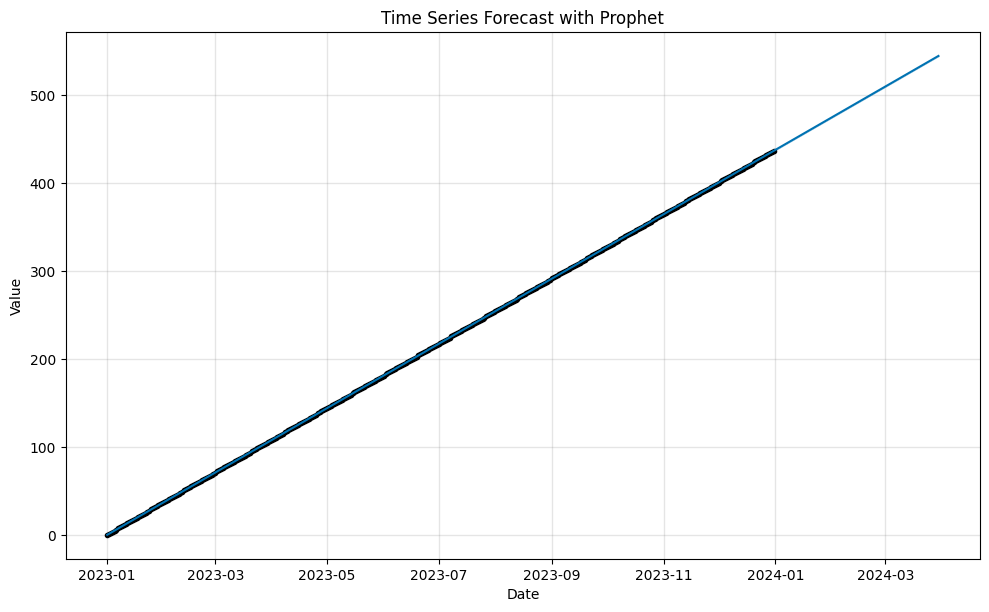

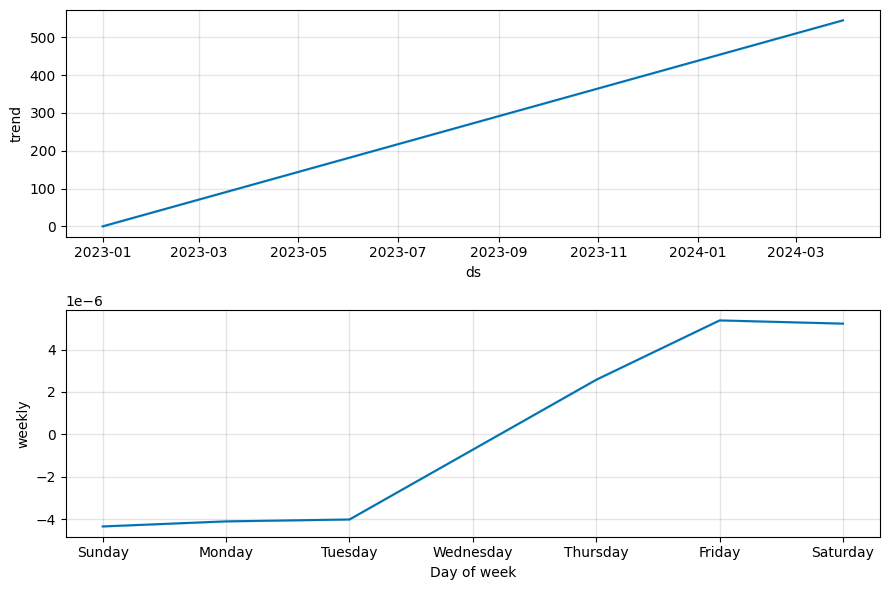

In [ ]:
import matplotlib.pyplot as plt

# Plot forecast
fig = model.plot(forecast)
plt.title("Time Series Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Plot components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()
